In [289]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,accuracy_score,plot_roc_curve,plot_confusion_matrix
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score,RepeatedStratifiedKFold
from sklearn import model_selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRFClassifier


In [290]:
train_df=pd.read_csv("Train_Dataset.csv",na_values='n/a')
test_df=pd.read_csv("Test_Dataset.csv",na_values='n/a')

In [291]:
pd.set_option('display.max_columns',None)

In [292]:
train_df.drop(train_df.index[5180:],inplace=True)

In [293]:
train_df.set_index(keys='EmployeeID',inplace=True)

In [294]:
train_df

,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
EmployeeID,,,,,,,,,,,,,,,,,,,,,
5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,Executive,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,Executive,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,3.0,Manager,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,Manager,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,Manager,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115176.0,0.0,36.0,Rarely,Analytics,13.0,CA,F,53.0,3.0,3.0,Manager,3.0,0.0,4.0,1.0,22.0,11.0,1.0,5.0,Single,22142.0
5115177.0,0.0,NaN,Rarely,Marketing,9.0,CA,Female,66.0,1.0,4.0,Executive,4.0,1.0,9.0,0.0,23.0,8.0,0.0,2.0,Single,17109.0
5115178.0,0.0,29.0,Rarely,Analytics,NaN,CA,Female,62.0,4.0,2.0,Executive,1.0,1.0,6.0,0.0,19.0,8.0,0.0,3.0,M,17532.0


In [295]:
train_df.isna().sum()

Attrition               0
Age                   316
TravelProfile           0
Department            124
HomeToWork            255
EducationField          0
Gender                 46
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

In [296]:
train_df.isna().sum()/len(train_df)

Attrition             0.000000
Age                   0.061004
TravelProfile         0.000000
Department            0.023938
HomeToWork            0.049228
EducationField        0.000000
Gender                0.008880
HourlnWeek            0.055405
Involvement           0.000000
WorkLifeBalance       0.000000
Designation           0.007336
JobSatisfaction       0.000000
ESOPs                 0.000000
NumCompaniesWorked    0.000000
OverTime              0.000000
SalaryHikelastYear    0.032625
WorkExperience        0.036100
LastPromotion         0.013514
CurrentProfile        0.060039
MaritalStatus         0.000000
MonthlyIncome         0.017954
dtype: float64

In [297]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5180 entries, 5110001.0 to 5115180.0
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Attrition           5180 non-null   float64
 1   Age                 4864 non-null   float64
 2   TravelProfile       5180 non-null   object 
 3   Department          5056 non-null   object 
 4   HomeToWork          4925 non-null   float64
 5   EducationField      5180 non-null   object 
 6   Gender              5134 non-null   object 
 7   HourlnWeek          4893 non-null   float64
 8   Involvement         5180 non-null   float64
 9   WorkLifeBalance     5180 non-null   float64
 10  Designation         5142 non-null   object 
 11  JobSatisfaction     5180 non-null   float64
 12  ESOPs               5180 non-null   float64
 13  NumCompaniesWorked  5180 non-null   float64
 14  OverTime            5180 non-null   float64
 15  SalaryHikelastYear  5011 non-null   floa

In [298]:
train_df.describe(include='object')

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
count,5180,5056,5180,5134,5142,5180
unique,3,3,6,3,5,4
top,Rarely,Analytics,Statistics,Male,Executive,Single
freq,3637,3219,2129,3094,2072,1776


In [299]:
train_df.describe(include='number')

,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
count,5180.000000,4864.000000,4925.000000,4893.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5011.000000,4993.000000,5110.000000,4869.000000,5087.000000
mean,0.278958,37.108553,11.107411,57.979767,3.226641,3.012741,3.144402,0.490541,3.157336,0.313514,20.649371,11.165832,2.552838,4.385295,21692.296442
std,0.448530,9.248647,8.455577,12.996674,0.872431,1.410602,1.342776,0.499959,2.606036,0.463966,3.706469,7.797783,3.234467,3.617643,4770.637922
min,0.000000,18.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1000.000000
25%,0.000000,30.000000,5.000000,49.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,18.000000,6.000000,1.000000,2.000000,18362.000000
50%,0.000000,36.000000,9.000000,59.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,20.000000,9.000000,1.000000,3.000000,20160.000000
75%,1.000000,43.000000,16.000000,67.000000,4.000000,4.000000,4.000000,1.000000,5.000000,1.000000,23.000000,15.000000,3.000000,7.000000,23443.500000
max,1.000000,61.000000,121.000000,99.000000,5.000000,5.000000,5.000000,1.000000,21.000000,1.000000,31.000000,41.000000,16.000000,18.000000,95000.000000


In [300]:
for feature in train_df.columns: 
    if train_df[feature].dtype == 'object': 
        print(feature)
        print(train_df[feature].value_counts(dropna=False))
        print('\n')

TravelProfile
Rarely    3637
Yes       1051
No         492
Name: TravelProfile, dtype: int64


Department
Analytics    3219
Sales        1615
Marketing     222
NaN           124
Name: Department, dtype: int64


EducationField
Statistics           2129
CA                   1560
Marketing Diploma     603
Engineer              487
Other                 284
MBA                   117
Name: EducationField, dtype: int64


Gender
Male      3094
Female    1338
F          702
NaN         46
Name: Gender, dtype: int64


Designation
Executive         2072
Manager           1756
Senior Manager     763
AVP                328
VP                 223
NaN                 38
Name: Designation, dtype: int64


MaritalStatus
Single      1776
Married     1614
Divorsed    1016
M            774
Name: MaritalStatus, dtype: int64




In [301]:
train_df['Gender'].replace('F', 'Female',inplace=True )
train_df['MaritalStatus'].replace('M', 'Married',inplace=True )


In [302]:
for feature in train_df.columns: 
    if train_df[feature].dtype == 'object': 
        print(feature)
        print(train_df[feature].value_counts(dropna=False))
        print('\n')

TravelProfile
Rarely    3637
Yes       1051
No         492
Name: TravelProfile, dtype: int64


Department
Analytics    3219
Sales        1615
Marketing     222
NaN           124
Name: Department, dtype: int64


EducationField
Statistics           2129
CA                   1560
Marketing Diploma     603
Engineer              487
Other                 284
MBA                   117
Name: EducationField, dtype: int64


Gender
Male      3094
Female    2040
NaN         46
Name: Gender, dtype: int64


Designation
Executive         2072
Manager           1756
Senior Manager     763
AVP                328
VP                 223
NaN                 38
Name: Designation, dtype: int64


MaritalStatus
Married     2388
Single      1776
Divorsed    1016
Name: MaritalStatus, dtype: int64




In [303]:
train_df_num=train_df.select_dtypes(exclude='object').columns
train_df_num=train_df_num.drop('Attrition')
train_df_num

Index(['Age', 'HomeToWork', 'HourlnWeek', 'Involvement', 'WorkLifeBalance',
       'JobSatisfaction', 'ESOPs', 'NumCompaniesWorked', 'OverTime',
       'SalaryHikelastYear', 'WorkExperience', 'LastPromotion',
       'CurrentProfile', 'MonthlyIncome'],
      dtype='object')

In [304]:
train_df_obj=train_df.select_dtypes(exclude='number').columns
train_df_obj

Index(['TravelProfile', 'Department', 'EducationField', 'Gender',
       'Designation', 'MaritalStatus'],
      dtype='object')

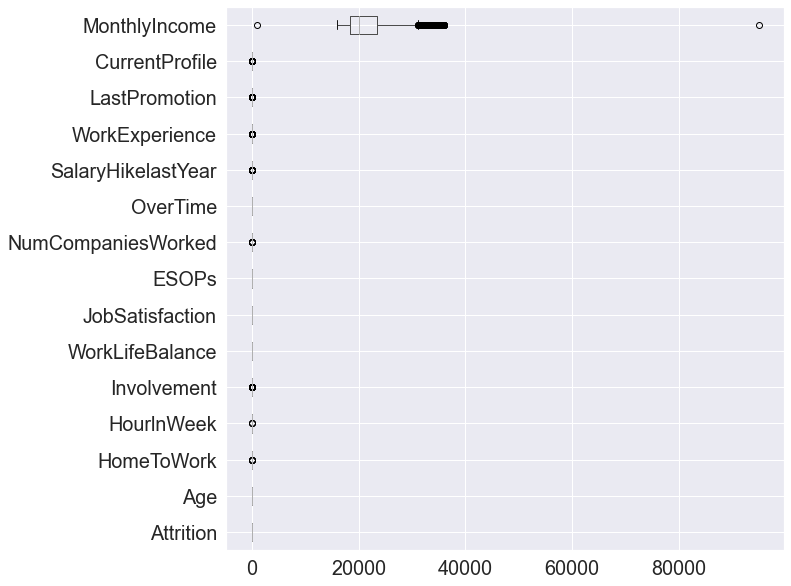

In [305]:
plt.figure(figsize=(10,10))
train_df.boxplot(vert=0)
plt.show()

## Impute the missing values

In [306]:
imp_obj=SimpleImputer(strategy='most_frequent')
imp_num=SimpleImputer(strategy='median')

In [307]:
train_df[train_df_num]= imp_num.fit_transform(train_df[train_df_num])

In [308]:
train_df[train_df_obj]= imp_obj.fit_transform(train_df[train_df_obj])

In [309]:
train_df.isna().sum()

Attrition             0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

## Encode the Categorical Variables

In [310]:
ohe=OneHotEncoder(sparse=False,handle_unknown='ignore')

In [311]:
ohe.fit_transform(train_df[train_df_obj])

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [312]:
train_df_obj

Index(['TravelProfile', 'Department', 'EducationField', 'Gender',
       'Designation', 'MaritalStatus'],
      dtype='object')

In [313]:
ohe_array= ohe.fit_transform(train_df[train_df_obj])

In [314]:
ohe.categories_

[array(['No', 'Rarely', 'Yes'], dtype=object),
 array(['Analytics', 'Marketing', 'Sales'], dtype=object),
 array(['CA', 'Engineer', 'MBA', 'Marketing Diploma', 'Other',
        'Statistics'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['AVP', 'Executive', 'Manager', 'Senior Manager', 'VP'],
       dtype=object),
 array(['Divorsed', 'Married', 'Single'], dtype=object)]

In [315]:
ohe_label=['Trvl_profileNo', 'Trvl_profileRarely', 'Trvl_profileYes','DeptAnalytics', 'DeptMarketing', 'DeptSales','Edu_CA', 'Edu_Engineer', 'Edu_MBA', 'Edu_Marketing Diploma', 'Edu_Other',' Edu_Statistics','Female', 'Male','AVP', 'Executive', 'Manager', 'Senior Manager', 'VP','Divorsed', 'Married', 'Single']
       

In [316]:
pd.DataFrame(ohe_array,columns=ohe_label)

,Trvl_profileNo,Trvl_profileRarely,Trvl_profileYes,DeptAnalytics,DeptMarketing,DeptSales,Edu_CA,Edu_Engineer,Edu_MBA,Edu_Marketing Diploma,Edu_Other,Edu_Statistics,Female,Male,AVP,Executive,Manager,Senior Manager,VP,Divorsed,Married,Single
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5176,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5177,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5178,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [317]:
ohe_enc=pd.DataFrame(ohe_array,columns=ohe_label,index=range(5110001,5115181))

In [318]:
ohe_enc.head()

,Trvl_profileNo,Trvl_profileRarely,Trvl_profileYes,DeptAnalytics,DeptMarketing,DeptSales,Edu_CA,Edu_Engineer,Edu_MBA,Edu_Marketing Diploma,Edu_Other,Edu_Statistics,Female,Male,AVP,Executive,Manager,Senior Manager,VP,Divorsed,Married,Single
5110001,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5110002,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5110003,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5110004,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5110005,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [319]:
train_df_num1=pd.DataFrame(train_df[['Age', 'HomeToWork', 'HourlnWeek', 'Involvement', 'WorkLifeBalance',
       'JobSatisfaction', 'ESOPs', 'NumCompaniesWorked', 'OverTime',
       'SalaryHikelastYear', 'WorkExperience', 'LastPromotion',
       'CurrentProfile', 'MonthlyIncome','Attrition']],index=range(5110001,5115181))

In [320]:
comb_encoded=pd.concat([train_df_num1,ohe_enc],axis=1)

In [321]:
comb_encoded

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome,Attrition,Trvl_profileNo,Trvl_profileRarely,Trvl_profileYes,DeptAnalytics,DeptMarketing,DeptSales,Edu_CA,Edu_Engineer,Edu_MBA,Edu_Marketing Diploma,Edu_Other,Edu_Statistics,Female,Male,AVP,Executive,Manager,Senior Manager,VP,Divorsed,Married,Single
5110001,35.0,5.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,7.0,2.0,3.0,18932.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5110002,32.0,5.0,62.0,4.0,3.0,2.0,0.0,8.0,0.0,20.0,4.0,1.0,3.0,18785.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5110003,31.0,5.0,45.0,5.0,3.0,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,22091.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5110004,34.0,10.0,32.0,3.0,2.0,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,20302.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5110005,37.0,27.0,49.0,3.0,4.0,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,21674.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115176,36.0,13.0,53.0,3.0,3.0,3.0,0.0,4.0,1.0,22.0,11.0,1.0,5.0,22142.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5115177,36.0,9.0,66.0,1.0,4.0,4.0,1.0,9.0,0.0,23.0,8.0,0.0,2.0,17109.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5115178,29.0,9.0,62.0,4.0,2.0,1.0,1.0,6.0,0.0,19.0,8.0,0.0,3.0,17532.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5115179,26.0,26.0,61.0,3.0,4.0,3.0,0.0,1.0,0.0,28.0,8.0,5.0,7.0,17942.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [322]:
comb_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 5110001 to 5115180
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    5180 non-null   float64
 1   HomeToWork             5180 non-null   float64
 2   HourlnWeek             5180 non-null   float64
 3   Involvement            5180 non-null   float64
 4   WorkLifeBalance        5180 non-null   float64
 5   JobSatisfaction        5180 non-null   float64
 6   ESOPs                  5180 non-null   float64
 7   NumCompaniesWorked     5180 non-null   float64
 8   OverTime               5180 non-null   float64
 9   SalaryHikelastYear     5180 non-null   float64
 10  WorkExperience         5180 non-null   float64
 11  LastPromotion          5180 non-null   float64
 12  CurrentProfile         5180 non-null   float64
 13  MonthlyIncome          5180 non-null   float64
 14  Attrition              5180 non-null   float64


In [242]:
sns.pairplot(comb_encoded)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000025345908700> (for post_execute):


KeyboardInterrupt: 

## Correlation Check

<AxesSubplot:>

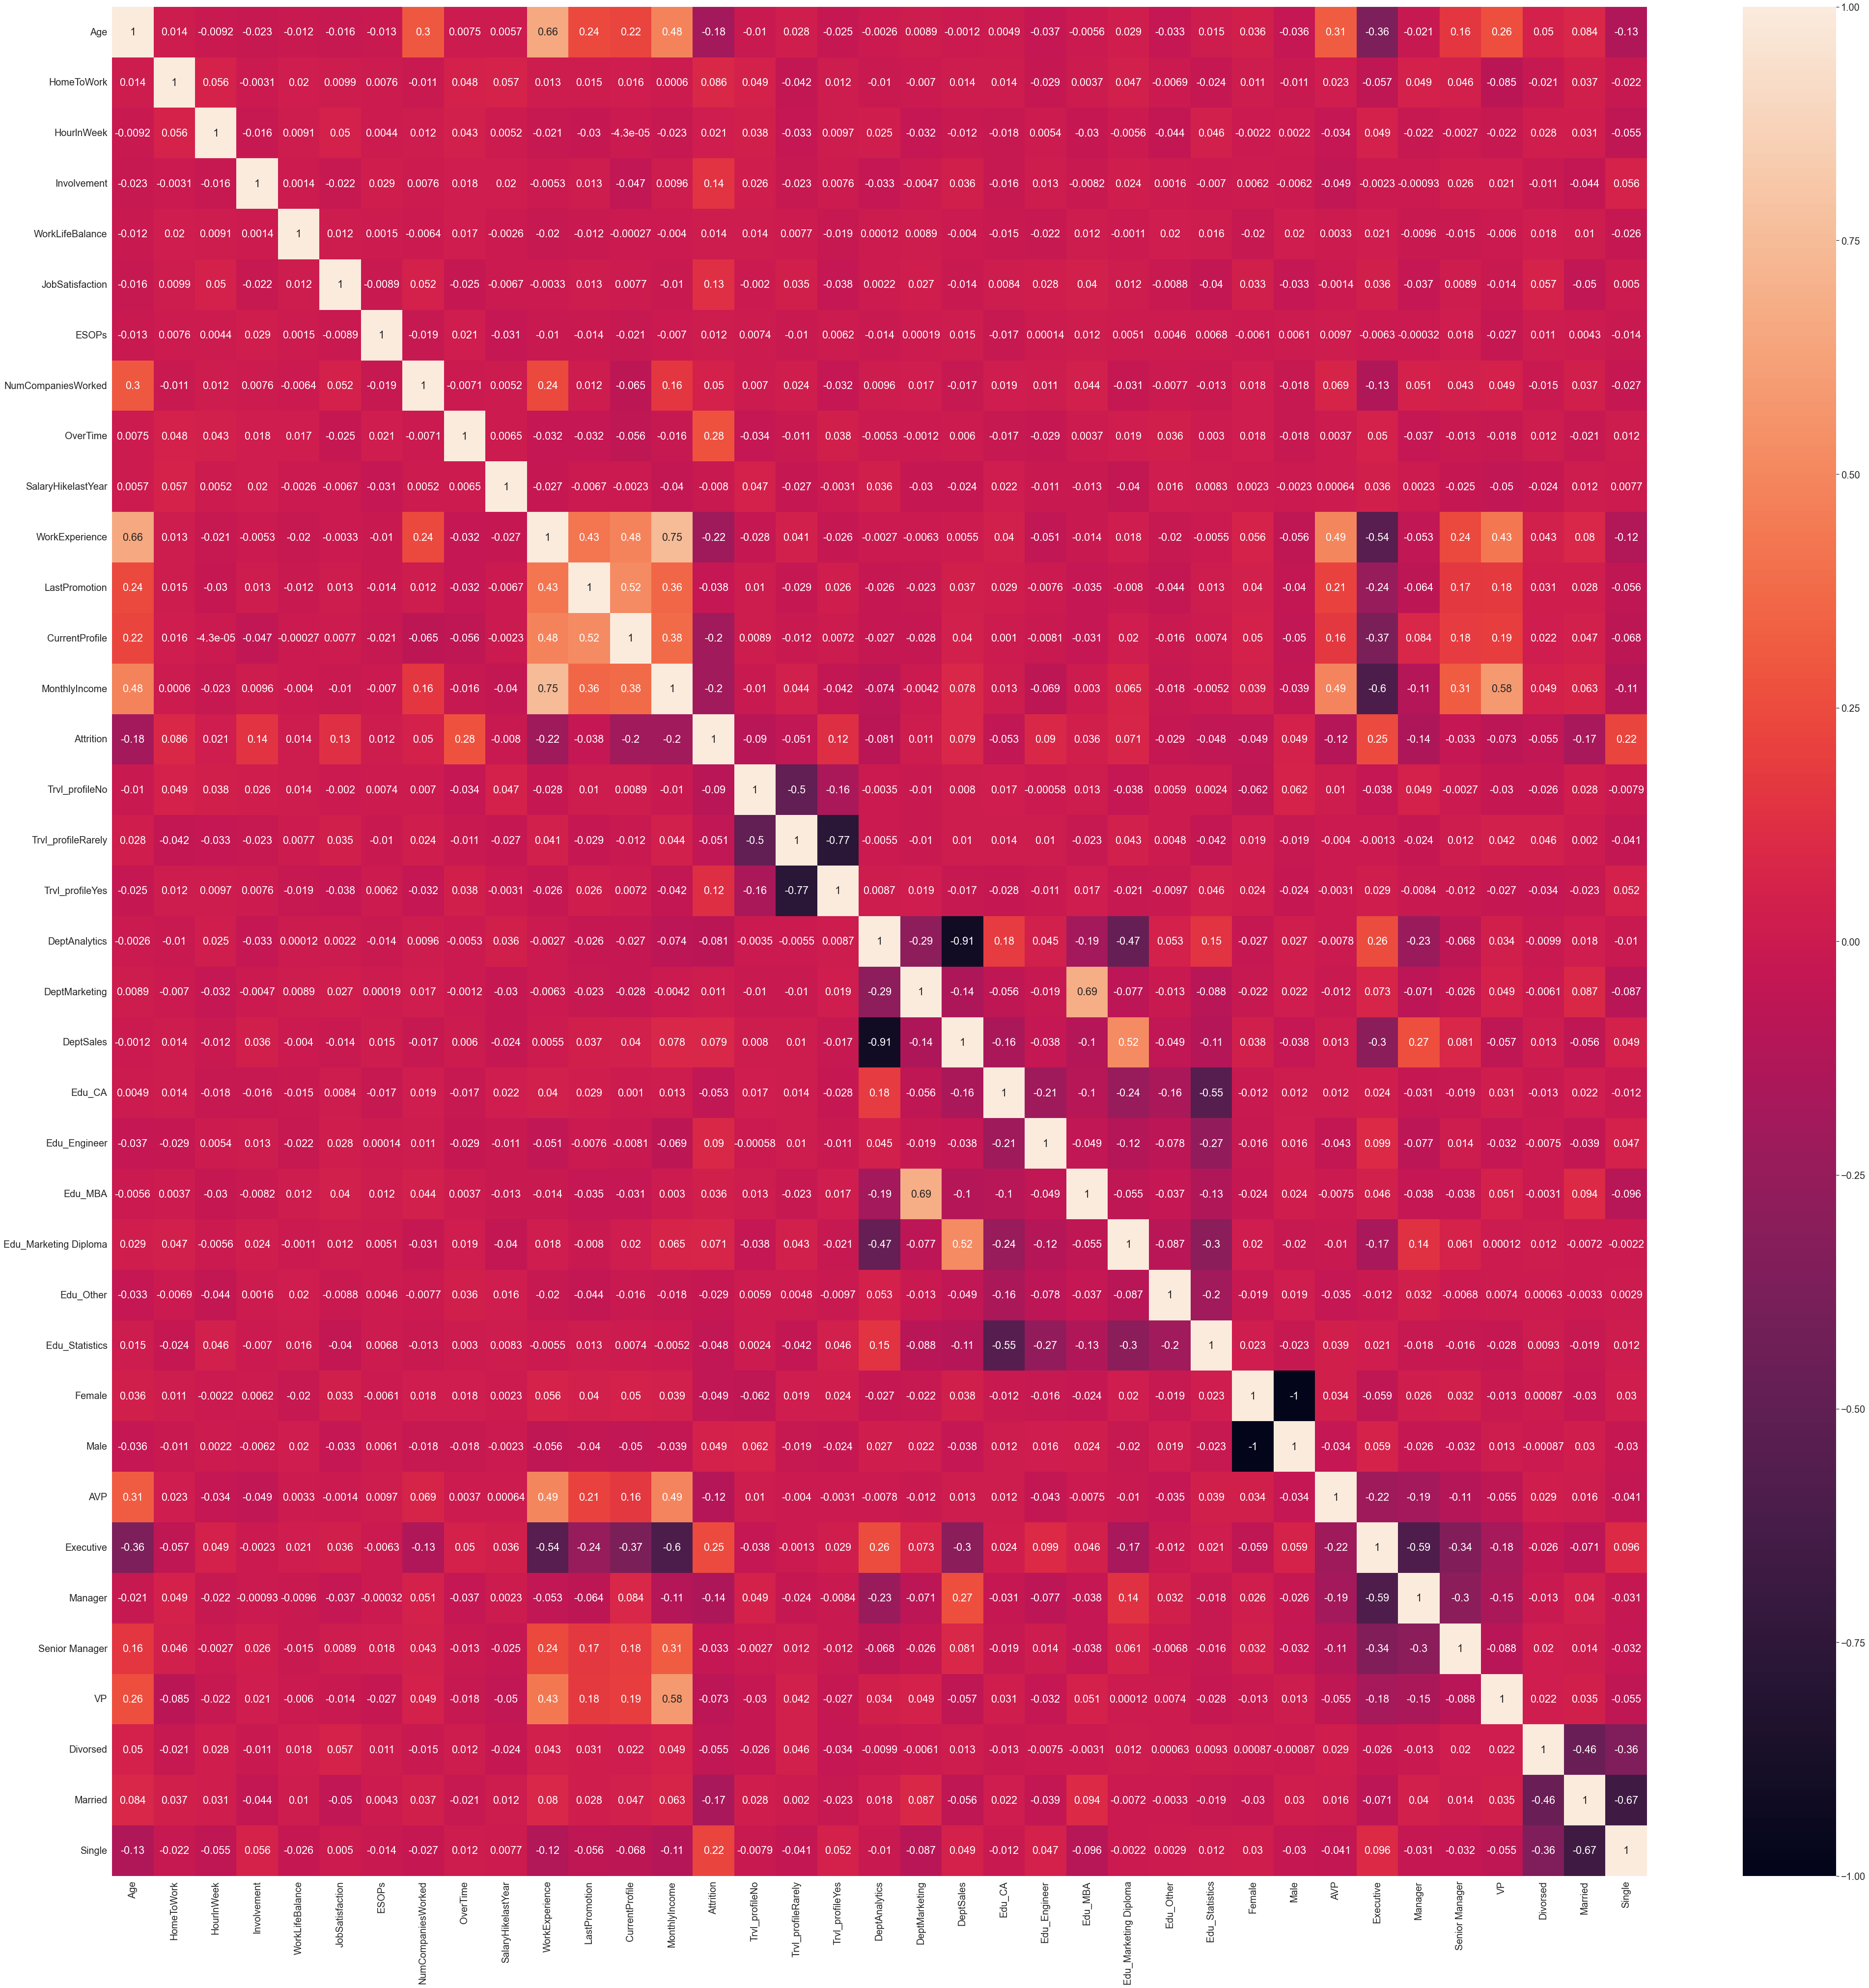

In [323]:
sns.set(font_scale=1.8)
plt.figure(figsize=(70,70))
sns.heatmap(comb_encoded.corr(),annot=True)

In [324]:
comb_encoded.corr()['Attrition'].sort_values(ascending=False)

Attrition                1.000000
OverTime                 0.281113
Executive                0.247403
Single                   0.219068
Involvement              0.144332
JobSatisfaction          0.126745
Trvl_profileYes          0.123964
Edu_Engineer             0.090186
HomeToWork               0.086266
DeptSales                0.078507
Edu_Marketing Diploma    0.070850
NumCompaniesWorked       0.049829
Male                     0.048519
Edu_MBA                  0.035813
HourlnWeek               0.021145
WorkLifeBalance          0.013608
ESOPs                    0.012200
DeptMarketing            0.010778
SalaryHikelastYear      -0.007994
Edu_Other               -0.028787
Senior Manager          -0.032605
LastPromotion           -0.038470
 Edu_Statistics         -0.048031
Female                  -0.048519
Trvl_profileRarely      -0.051362
Edu_CA                  -0.052707
Divorsed                -0.054659
VP                      -0.072545
DeptAnalytics           -0.080578
Trvl_profileNo

<AxesSubplot:>

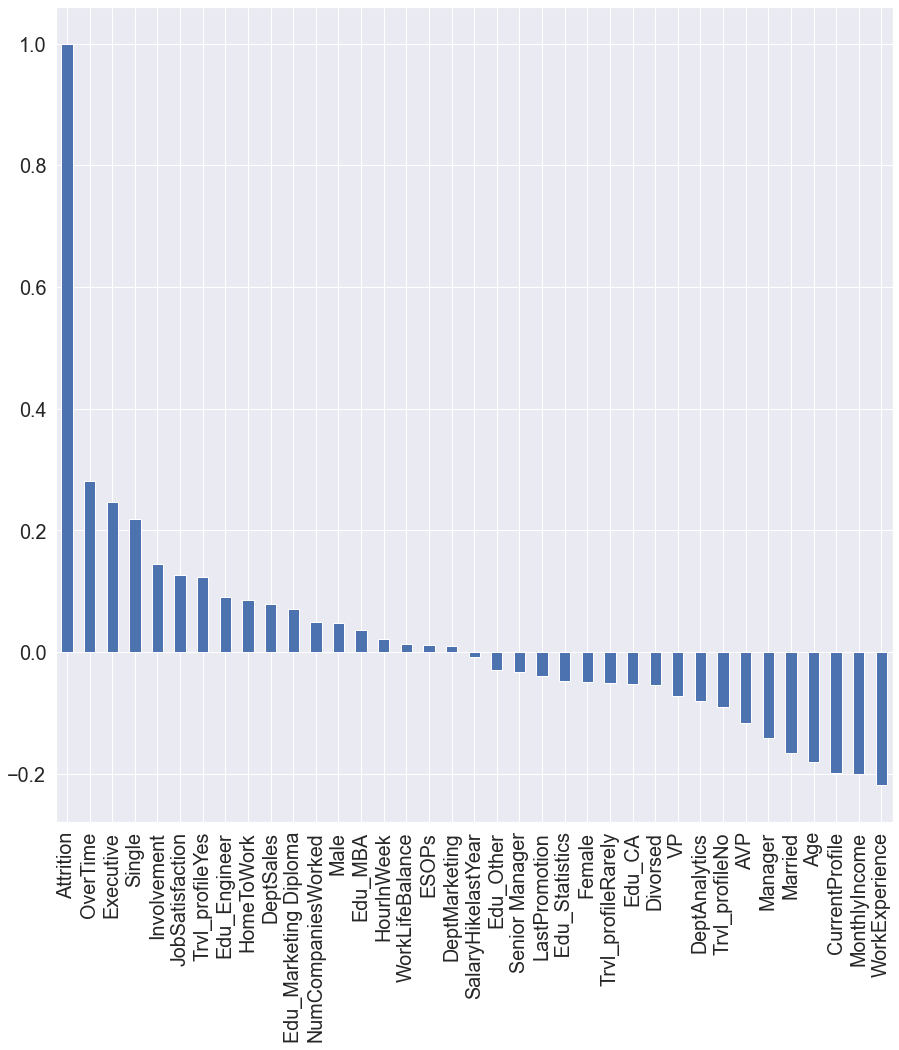

In [325]:
plt.figure(figsize=(15,15))
comb_encoded.corr()['Attrition'].sort_values(ascending=False).plot(kind='bar')

## Feature Selection         

In [326]:
feature_cols=comb_encoded[['OverTime','Executive','Single','Involvement','JobSatisfaction','Trvl_profileYes','Edu_Engineer','HomeToWork',
            'DeptSales','Edu_Marketing Diploma','AVP','Manager','Married','Age','CurrentProfile','MonthlyIncome','WorkExperience']]
feature_cols

,OverTime,Executive,Single,Involvement,JobSatisfaction,Trvl_profileYes,Edu_Engineer,HomeToWork,DeptSales,Edu_Marketing Diploma,AVP,Manager,Married,Age,CurrentProfile,MonthlyIncome,WorkExperience
5110001,1.0,1.0,0.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,35.0,3.0,18932.0,7.0
5110002,0.0,1.0,1.0,4.0,2.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,32.0,3.0,18785.0,4.0
5110003,0.0,0.0,1.0,5.0,2.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,31.0,3.0,22091.0,12.0
5110004,0.0,0.0,0.0,3.0,4.0,1.0,0.0,10.0,1.0,0.0,0.0,1.0,0.0,34.0,3.0,20302.0,5.0
5110005,0.0,0.0,0.0,3.0,4.0,0.0,0.0,27.0,0.0,0.0,0.0,1.0,0.0,37.0,9.0,21674.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115176,1.0,0.0,1.0,3.0,3.0,0.0,0.0,13.0,0.0,0.0,0.0,1.0,0.0,36.0,5.0,22142.0,11.0
5115177,0.0,1.0,1.0,1.0,4.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,36.0,2.0,17109.0,8.0
5115178,0.0,1.0,0.0,4.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,1.0,29.0,3.0,17532.0,8.0
5115179,0.0,1.0,0.0,3.0,3.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,26.0,7.0,17942.0,8.0


## Separate Independent and Dependent variable as X and Y

In [327]:
X=comb_encoded.drop('Attrition',axis=1)
y=comb_encoded['Attrition']

In [328]:
X_feature=feature_cols
y_feature=comb_encoded['Attrition']

## Test Data set

In [389]:
test_ID=pd.read_csv("Test_Dataset.csv",na_values='n/a')

In [329]:
test_df.set_index(keys='EmployeeID',inplace=True)

In [330]:
test_df

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
EmployeeID,,,,,,,,,,,,,,,,,,,,
6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,Executive,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,Executive,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,Executive,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0
6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,Manager,3,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0
6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,Senior Manager,5,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6112626,46.0,Rarely,Sales,12.0,Marketing Diploma,Male,76.0,3,5,Senior Manager,5,1,5,1,18.0,10.0,1.0,3.0,Married,26761.0
6112627,29.0,Rarely,Analytics,22.0,CA,Male,80.0,4,4,Executive,5,0,2,0,18.0,7.0,4.0,4.0,Divorsed,19196.0
6112628,44.0,Rarely,Analytics,8.0,CA,F,42.0,4,1,Senior Manager,1,1,3,0,19.0,24.0,5.0,17.0,Married,25248.0


In [331]:
test_df.isna().sum()

Age                   142
TravelProfile           0
Department             58
HomeToWork            126
EducationField          0
Gender                 30
HourlnWeek            136
Involvement             0
WorkLifeBalance         0
Designation            30
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

In [332]:
test_df.isna().sum()/len(test_df)

Age                   0.053992
TravelProfile         0.000000
Department            0.022053
HomeToWork            0.047909
EducationField        0.000000
Gender                0.011407
HourlnWeek            0.051711
Involvement           0.000000
WorkLifeBalance       0.000000
Designation           0.011407
JobSatisfaction       0.000000
ESOPs                 0.000000
NumCompaniesWorked    0.000000
OverTime              0.000000
SalaryHikelastYear    0.035741
WorkExperience        0.046388
LastPromotion         0.021673
CurrentProfile        0.050951
MaritalStatus         0.000000
MonthlyIncome         0.012548
dtype: float64

In [333]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 6110001 to 6112630
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2488 non-null   float64
 1   TravelProfile       2630 non-null   object 
 2   Department          2572 non-null   object 
 3   HomeToWork          2504 non-null   float64
 4   EducationField      2630 non-null   object 
 5   Gender              2600 non-null   object 
 6   HourlnWeek          2494 non-null   float64
 7   Involvement         2630 non-null   int64  
 8   WorkLifeBalance     2630 non-null   int64  
 9   Designation         2600 non-null   object 
 10  JobSatisfaction     2630 non-null   int64  
 11  ESOPs               2630 non-null   int64  
 12  NumCompaniesWorked  2630 non-null   int64  
 13  OverTime            2630 non-null   int64  
 14  SalaryHikelastYear  2536 non-null   float64
 15  WorkExperience      2508 non-null   float64
 1

In [334]:
test_df.describe(include='object')

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
count,2630,2572,2630,2600,2600,2630
unique,3,3,6,3,5,4
top,Rarely,Analytics,Statistics,Male,Executive,Single
freq,1852,1675,1040,1574,993,933


In [335]:
test_df.describe(include='number')

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
count,2488.000000,2504.000000,2494.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2536.000000,2508.000000,2573.000000,2496.000000,2597.000000
mean,37.425643,11.428115,57.863272,3.239544,3.069202,3.115589,0.504943,3.222814,0.330038,20.636830,11.525518,2.661096,4.506811,21824.038891
std,9.357662,8.848326,13.234507,0.884138,1.416552,1.337760,0.500071,2.663692,0.470316,3.725519,8.125348,3.303497,3.585424,5092.623158
min,18.000000,1.000000,12.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1000.000000
25%,31.000000,5.000000,49.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,18.000000,6.000000,1.000000,2.000000,18407.000000
50%,36.000000,9.000000,59.000000,3.000000,3.000000,3.000000,1.000000,2.000000,0.000000,19.000000,10.000000,1.000000,3.000000,20332.000000
75%,44.000000,17.000000,67.000000,4.000000,4.000000,4.000000,1.000000,5.000000,1.000000,23.000000,16.000000,3.000000,8.000000,23587.000000
max,61.000000,123.000000,110.000000,5.000000,5.000000,5.000000,1.000000,20.000000,1.000000,31.000000,41.000000,16.000000,18.000000,96000.000000


In [336]:
for feature in test_df.columns: 
    if test_df[feature].dtype == 'object': 
        print(feature)
        print(test_df[feature].value_counts(dropna=False))
        print('\n')

TravelProfile
Rarely    1852
Yes        529
No         249
Name: TravelProfile, dtype: int64


Department
Analytics    1675
Sales         792
Marketing     105
NaN            58
Name: Department, dtype: int64


EducationField
Statistics           1040
CA                    857
Marketing Diploma     291
Engineer              263
Other                 145
MBA                    34
Name: EducationField, dtype: int64


Gender
Male      1574
Female     682
F          344
NaN         30
Name: Gender, dtype: int64


Designation
Executive         993
Manager           920
Senior Manager    391
AVP               179
VP                117
NaN                30
Name: Designation, dtype: int64


MaritalStatus
Single      933
Married     841
Divorsed    477
M           379
Name: MaritalStatus, dtype: int64




In [337]:
test_df['Gender'].replace('F', 'Female',inplace=True )
test_df['MaritalStatus'].replace('M', 'Married',inplace=True )

In [338]:
test_df_num=test_df.select_dtypes(exclude='object').columns
test_df_num

Index(['Age', 'HomeToWork', 'HourlnWeek', 'Involvement', 'WorkLifeBalance',
       'JobSatisfaction', 'ESOPs', 'NumCompaniesWorked', 'OverTime',
       'SalaryHikelastYear', 'WorkExperience', 'LastPromotion',
       'CurrentProfile', 'MonthlyIncome'],
      dtype='object')

In [339]:
test_df_obj=test_df.select_dtypes(exclude='number').columns
test_df_obj

Index(['TravelProfile', 'Department', 'EducationField', 'Gender',
       'Designation', 'MaritalStatus'],
      dtype='object')

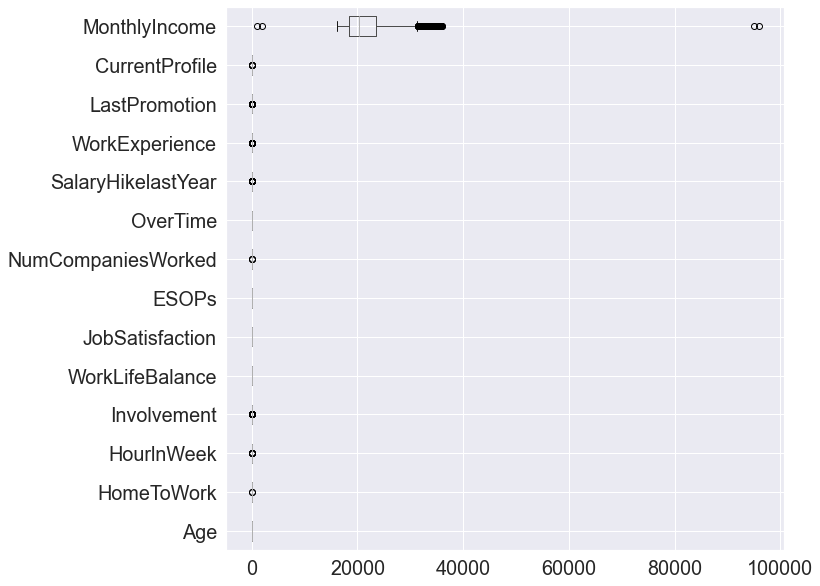

In [340]:
plt.figure(figsize=(10,10))
test_df.boxplot(vert=0)
plt.show()

## Impute the missing values

In [341]:
test_df[test_df_num]= imp_num.transform(test_df[test_df_num])

In [342]:
imp_num.statistics_

array([3.600e+01, 9.000e+00, 5.900e+01, 3.000e+00, 3.000e+00, 3.000e+00,
       0.000e+00, 2.000e+00, 0.000e+00, 2.000e+01, 9.000e+00, 1.000e+00,
       3.000e+00, 2.016e+04])

In [343]:
test_df[test_df_obj]= imp_obj.transform(test_df[test_df_obj])

In [344]:
imp_obj.statistics_

array(['Rarely', 'Analytics', 'Statistics', 'Male', 'Executive',
       'Married'], dtype=object)

In [345]:
for feature in test_df.columns: 
    if test_df[feature].dtype == 'object': 
        print(feature)
        print(test_df[feature].value_counts(dropna=False))
        print('\n')

TravelProfile
Rarely    1852
Yes        529
No         249
Name: TravelProfile, dtype: int64


Department
Analytics    1733
Sales         792
Marketing     105
Name: Department, dtype: int64


EducationField
Statistics           1040
CA                    857
Marketing Diploma     291
Engineer              263
Other                 145
MBA                    34
Name: EducationField, dtype: int64


Gender
Male      1604
Female    1026
Name: Gender, dtype: int64


Designation
Executive         1023
Manager            920
Senior Manager     391
AVP                179
VP                 117
Name: Designation, dtype: int64


MaritalStatus
Married     1220
Single       933
Divorsed     477
Name: MaritalStatus, dtype: int64




## Encode the Categorical Variables

In [346]:
ohe.transform(test_df[test_df_obj])

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [347]:
test_df_obj

Index(['TravelProfile', 'Department', 'EducationField', 'Gender',
       'Designation', 'MaritalStatus'],
      dtype='object')

In [348]:
ohe_array= ohe.transform(test_df[test_df_obj])

In [349]:
ohe_label=['Trvl_profileNo', 'Trvl_profileRarely', 'Trvl_profileYes','DeptAnalytics', 'DeptMarketing', 'DeptSales','Edu_CA', 'Edu_Engineer', 'Edu_MBA', 'Edu_Marketing Diploma', 'Edu_Other',' Edu_Statistics','Female', 'Male','AVP', 'Executive', 'Manager', 'Senior Manager', 'VP','Divorsed', 'Married', 'Single']

In [350]:
pd.DataFrame(ohe_array,columns=ohe_label)

,Trvl_profileNo,Trvl_profileRarely,Trvl_profileYes,DeptAnalytics,DeptMarketing,DeptSales,Edu_CA,Edu_Engineer,Edu_MBA,Edu_Marketing Diploma,Edu_Other,Edu_Statistics,Female,Male,AVP,Executive,Manager,Senior Manager,VP,Divorsed,Married,Single
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2626,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2627,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2628,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [351]:
ohe_enc=pd.DataFrame(ohe_array,columns=ohe_label,index=range(6110001,6112631))

In [352]:
ohe_enc.head()

,Trvl_profileNo,Trvl_profileRarely,Trvl_profileYes,DeptAnalytics,DeptMarketing,DeptSales,Edu_CA,Edu_Engineer,Edu_MBA,Edu_Marketing Diploma,Edu_Other,Edu_Statistics,Female,Male,AVP,Executive,Manager,Senior Manager,VP,Divorsed,Married,Single
6110001,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6110002,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6110003,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6110004,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6110005,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [353]:
test_df_num1=pd.DataFrame(test_df[['Age', 'HomeToWork', 'HourlnWeek', 'Involvement', 'WorkLifeBalance',
       'JobSatisfaction', 'ESOPs', 'NumCompaniesWorked', 'OverTime',
       'SalaryHikelastYear', 'WorkExperience', 'LastPromotion',
       'CurrentProfile', 'MonthlyIncome']],index=range(6110001,6112631))


In [354]:
comb_encoded_test=pd.concat([test_df_num1,ohe_enc],axis=1)

In [355]:
comb_encoded_test

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome,Trvl_profileNo,Trvl_profileRarely,Trvl_profileYes,DeptAnalytics,DeptMarketing,DeptSales,Edu_CA,Edu_Engineer,Edu_MBA,Edu_Marketing Diploma,Edu_Other,Edu_Statistics,Female,Male,AVP,Executive,Manager,Senior Manager,VP,Divorsed,Married,Single
6110001,18.0,9.0,80.0,3.0,2.0,3.0,1.0,1.0,0.0,17.0,0.0,0.0,0.0,16904.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6110002,20.0,28.0,59.0,1.0,3.0,1.0,1.0,2.0,1.0,18.0,2.0,1.0,3.0,18994.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6110003,50.0,19.0,76.0,3.0,3.0,5.0,0.0,5.0,1.0,22.0,18.0,3.0,3.0,18587.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6110004,32.0,23.0,73.0,5.0,2.0,3.0,0.0,4.0,1.0,17.0,5.0,3.0,3.0,20559.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6110005,39.0,7.0,42.0,4.0,1.0,5.0,1.0,4.0,0.0,20.0,9.0,1.0,7.0,24991.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6112626,46.0,12.0,76.0,3.0,5.0,5.0,1.0,5.0,1.0,18.0,10.0,1.0,3.0,26761.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6112627,29.0,22.0,80.0,4.0,4.0,5.0,0.0,2.0,0.0,18.0,7.0,4.0,4.0,19196.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6112628,44.0,8.0,42.0,4.0,1.0,1.0,1.0,3.0,0.0,19.0,24.0,5.0,17.0,25248.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6112629,36.0,11.0,59.0,4.0,3.0,4.0,0.0,2.0,0.0,18.0,2.0,1.0,1.0,17261.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [356]:
X_test=comb_encoded_test

In [ ]:
feature_cols_test=comb_encoded_test.drop(['Male','disloyal Customer','Eco','Personal Travel','Age','DepartureDelay_in_Mins'],axis=1)
feature_cols_test

In [385]:
feature_cols_test=comb_encoded_test[['OverTime','Executive','Single','Involvement','JobSatisfaction','Trvl_profileYes','Edu_Engineer','HomeToWork',
            'DeptSales','Edu_Marketing Diploma','AVP','Manager','Married','Age','CurrentProfile','MonthlyIncome','WorkExperience']]

In [386]:
X_feature_test=feature_cols_test

## Apply basic Models

In [413]:
dtc = DecisionTreeClassifier(criterion = 'gini' )

In [414]:
dtc.fit(X, y)

DecisionTreeClassifier()

In [415]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('C:/Users/sunda/Downloads/Hackathons/Employee Attrition/credit_tree.dot','w')
dot_data = tree.export_graphviz(dtc, out_file=Credit_Tree_File, feature_names = list(X), class_names = list(train_char_label))

Credit_Tree_File.close()

In [426]:
print (pd.DataFrame(dtc.feature_importances_, columns = ["Imp"], index = X.columns))

                            Imp
Age                    0.099978
HomeToWork             0.085579
HourlnWeek             0.069631
Involvement            0.037591
WorkLifeBalance        0.000000
JobSatisfaction        0.043793
ESOPs                  0.000000
NumCompaniesWorked     0.066845
OverTime               0.079024
SalaryHikelastYear     0.045368
WorkExperience         0.087113
LastPromotion          0.038996
CurrentProfile         0.024210
MonthlyIncome          0.081150
Trvl_profileNo         0.001718
Trvl_profileRarely     0.006847
Trvl_profileYes        0.010527
DeptAnalytics          0.011824
DeptMarketing          0.004000
DeptSales              0.031672
Edu_CA                 0.013929
Edu_Engineer           0.011705
Edu_MBA                0.000000
Edu_Marketing Diploma  0.011345
Edu_Other              0.005429
 Edu_Statistics        0.008095
Female                 0.007089
Male                   0.001296
AVP                    0.001470
Executive              0.058586
Manager 

In [ ]:
# n_estimator is the number of tree to be built in the rand.forest classifier
# fit the training data (independent and dependent variables) to train the model
# max depth: upto how many levels the computation needs to be performed
# max feature:  How many indepedent features needs tobe used for deciding the splitting of nodes.  Eg: if max feature is 5, then 
# 5 randomly choosen variables are checked for Gini Gain (measure of impurity = Gini index root - Gini index weighted average)
# Max. Gini Gain is the node used for splitting.
# min sample leaf : How many leafs have to be present in each of the terminal node or leaf node after computation
# min sample leaf: 1 to 3 % total number of training data
# min sample split: 3 times the size of min sample leaf
#n_estimator: number of trees to grow

In [533]:
rfcl = RandomForestClassifier(random_state=1,criterion='gini', n_estimators=450,max_depth=25,max_features=20,min_samples_leaf=1,min_samples_split=2)
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_rfcl=cross_val_score(rfcl,X,y,scoring='accuracy', cv=cv1, n_jobs=-1 )
print(scores_rfcl)

[0.99420849 0.99034749 0.99034749 0.99420849 0.98648649 0.98841699
 0.99420849 0.99420849 0.98069498 0.98841699 0.98841699 0.99420849
 0.98648649 0.99034749 0.99034749 0.98841699 0.99227799 0.99227799
 0.996139   0.99227799 0.99227799 0.996139   0.98841699 0.99034749
 0.98262548 0.99034749 0.99034749 0.99420849 0.99034749 0.98841699]


In [465]:
# max_depth=20,max_features=20,min_samples_leaf=1,min_samples_split=2

In [534]:
print(scores_rfcl.mean())

0.9905405405405403


In [517]:
rfcl = RandomForestClassifier(random_state=1,criterion='gini', n_estimators=500,max_depth=25,max_features=10,min_samples_leaf=1,min_samples_split=2)
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_rfcl2=cross_val_score(rfcl,X_feature,y_feature,scoring='accuracy', cv=cv1, n_jobs=-1 )
print(scores_rfcl2)

[0.99227799 0.98648649 0.98069498 0.99034749 0.98455598 0.98841699
 0.99034749 0.99034749 0.97683398 0.98841699 0.98069498 0.99227799
 0.98069498 0.98262548 0.99034749 0.98841699 0.98455598 0.97876448
 0.99227799 0.98262548 0.98455598 0.996139   0.98262548 0.98648649
 0.99034749 0.98648649 0.98455598 0.99227799 0.97683398 0.98262548]


In [518]:
print(scores_rfcl2.mean())

0.9861647361647362


In [361]:
logreg=LogisticRegression(solver='lbfgs',random_state=1,max_iter=1000,tol=0.001,class_weight='balanced')
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_logreg=cross_val_score(logreg,X,y,scoring='accuracy', cv=cv1, n_jobs=-1 )
print(scores_logreg)

[0.74903475 0.7027027  0.75096525 0.72200772 0.75096525 0.71621622
 0.71621622 0.77413127 0.76254826 0.75289575 0.75675676 0.71814672
 0.77027027 0.67181467 0.76447876 0.72393822 0.75096525 0.76061776
 0.77220077 0.73166023 0.75289575 0.76254826 0.73359073 0.74131274
 0.75868726 0.73359073 0.75289575 0.74324324 0.74131274 0.7046332 ]


In [362]:
print(scores_logreg.mean())

0.7414414414414414


In [363]:
logreg=LogisticRegression(solver='lbfgs',random_state=1,max_iter=1000,tol=0.001,class_weight='balanced')
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_logreg2=cross_val_score(logreg,X_feature,y_feature,scoring='accuracy', cv=cv1, n_jobs=-1 )
print(scores_logreg2)

[0.73359073 0.6988417  0.68146718 0.71621622 0.71042471 0.71235521
 0.75096525 0.7046332  0.71428571 0.63706564 0.73359073 0.70656371
 0.74517375 0.65250965 0.74517375 0.72779923 0.73166023 0.74903475
 0.72779923 0.66409266 0.74324324 0.74903475 0.70849421 0.72393822
 0.66216216 0.72779923 0.65444015 0.69305019 0.73745174 0.61196911]


In [364]:
print(scores_logreg2.mean())

0.7084942084942086


In [365]:
gbcl = GradientBoostingClassifier(random_state=1,n_estimators=200,max_depth=15)
scores_gbcl=cross_val_score(gbcl,X,y,cv=10,scoring='accuracy',n_jobs=-1)
print(scores_gbcl)

[0.97104247 0.98069498 0.97490347 0.95945946 0.96525097 0.97683398
 0.96525097 0.98262548 0.96718147 0.97490347]


In [366]:
print(scores_gbcl.mean())

0.9718146718146718


In [367]:
gbcl = GradientBoostingClassifier(random_state=1,n_estimators=200,max_depth=15)
scores_gbcl2=cross_val_score(gbcl,X_feature,y_feature,cv=10,scoring='accuracy',n_jobs=-1)
print(scores_gbcl2)

[0.97297297 0.96332046 0.97490347 0.95366795 0.97490347 0.97297297
 0.97297297 0.97876448 0.97490347 0.97104247]


In [368]:
print(scores_gbcl2.mean())

0.9710424710424711


In [557]:
xgb = XGBRFClassifier(max_depth=25,subsample=0.8, n_estimators=1000,learning_rate=0.1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
scores_xgb = cross_val_score(xgb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores_xgb)

KeyboardInterrupt: 

In [556]:
print(scores_xgb.mean())

0.979054054054054


In [375]:
xgb = XGBRFClassifier(max_depth=20,subsample=1, n_estimators=1000,learning_rate=0.4)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
scores_xgb1 = cross_val_score(xgb, X_feature, y_feature, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores_xgb1)

[0.97104247 0.96138996 0.96718147 0.97683398 0.97104247 0.96718147
 0.98262548 0.97297297 0.95559846 0.96525097 0.96525097 0.95945946
 0.96911197 0.95559846 0.97683398 0.97297297 0.94980695 0.96718147
 0.97490347 0.94787645]


In [376]:
print(scores_xgb1.mean())

0.9665057915057915


## Voting Classifier

In [559]:
# group / ensemble of models
xgb = XGBRFClassifier(max_depth=25,subsample=0.9, n_estimators=1000,learning_rate=0.2)
rfcl = RandomForestClassifier(random_state=1,criterion='gini', n_estimators=450,max_depth=25,max_features=20,min_samples_leaf=1,min_samples_split=2)
# gbcl = GradientBoostingClassifier(random_state=1,n_estimators=200,max_depth=15)

estimator = [('RFC', rfcl),('XGB', xgb)]

In [560]:
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')

scores_vot_soft = cross_val_score(vot_soft, X,y ,scoring='accuracy', cv=5, n_jobs=-1)
print(scores_vot_soft)


[0.98455598 0.97683398 0.97490347 0.98745174 0.98841699]


In [561]:
vot_soft.fit(X, y)


C:\Users\sunda\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('RFC',
                              RandomForestClassifier(max_depth=25,
                                                     max_features=20,
                                                     n_estimators=450,
                                                     random_state=1)),
                             ('XGB',
                              XGBRFClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.2,
                                              max_delta_step=None, max_depth=25

In [562]:
test_pred= vot_soft.predict(X_test)

In [563]:
result={'EmployeeID':test_ID.EmployeeID,'Attrition':test_pred}

In [564]:
pd.DataFrame({'EmployeeID':test_ID.EmployeeID,'Attrition':test_pred}).set_index('EmployeeID').to_csv('sub.csv')